## Assignment : 14

<pre>
1. Preprocess all the Data we have in DonorsChoose <a href='https://drive.google.com/drive/folders/1MIwK7BQMev8f5CbDDVNLPaFGB32pFN60'>Dataset</a> use train.csv
2. Combine 4 essay's into one column named - 'preprocessed_essays'. 
3. After step 2 you have to train 3 types of models as discussed below. 
4. For all the model use <a href=''https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics>'auc'</a> as a metric. check <a href'https://datascience.stackexchange.com/a/20192'>this</a> for using auc as a metric 
5. You are free to choose any number of layers/hiddden units but you have to use same type of architectures shown below. 
6. You can use any one of the optimizers and choice of Learning rate and momentum, resources: <a href='http://cs231n.github.io/neural-networks-3/'>cs231n class notes</a>, <a href='https://www.youtube.com/watch?v=hd_KFJ5ktUc'>cs231n class video</a>. 
7. For all the model's use <a href='https://www.youtube.com/watch?v=2U6Jl7oqRkM'>TensorBoard</a> and plot the Metric value and Loss with epoch. While submitting, take a screenshot of plots and include those images in .ipynb notebook and PDF. 
8. Use Categorical Cross Entropy as Loss to minimize.
</pre>

### Model-1

Build and Train deep neural network as shown below

<img src='https://i.imgur.com/w395Yk9.png'>
ref: https://i.imgur.com/w395Yk9.png

- __Input_seq_total_text_data__ --- You have to give Total text data columns. After this use the Embedding layer to get word vectors. Use given predefined glove word vectors, don't train any word vectors. After this use LSTM and get the LSTM output and Flatten that output. 
- __Input_school_state__ --- Give 'school_state' column as input to embedding layer and Train the Keras Embedding layer. 
- __Project_grade_category__  --- Give 'project_grade_category' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_categories__ --- Give 'input_clean_categories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_clean_subcategories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_teacher_prefix' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_remaining_teacher_number_of_previously_posted_projects._resource_summary_contains_numerical_digits._price._quantity__ ---concatenate remaining columns and add a Dense layer after that. 



- For LSTM, you can choose your sequence padding methods on your own or you can train your LSTM without padding, there is no restriction on that.

Below is an example of embedding layer for a categorical columns. In below code all are dummy values, we gave only for referance. 

In [1]:
'''input_layer = Input(shape=(n,))
embedding = Embedding(no_1, no_2, input_length=n)(input_layer)
flatten = Flatten()(embedding)'''

'input_layer = Input(shape=(n,))\nembedding = Embedding(no_1, no_2, input_length=n)(input_layer)\nflatten = Flatten()(embedding)'

### 1. Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
### 2. Please go through this link https://keras.io/getting-started/functional-api-guide/ and check the 'Multi-input and multi-output models' then you will get to know how to give multiple inputs. 

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding,Dropout,Input,LSTM,Flatten

Using TensorFlow backend.


In [3]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
id1='1T48h84GLW3dpy9F6ble5nF_1gQxBO8rx'
id2='14OVXWu_SJU-lJD-jKMOCld14EZ21lYYe' 
downloaded1 = drive.CreateFile({'id': id1}) 
downloaded1.GetContentFile('train_data.csv')
downloaded = drive.CreateFile({'id': id2}) 
downloaded.GetContentFile('resources.csv')
downloaded = drive.CreateFile({'id':'1Z6bjXmyCaoEzXYo_tRDwLTsfeA2F3K3j'}) 
downloaded.GetContentFile('glove_vector') 

downloaded = drive.CreateFile({'id':'1sh4p_gNyiD_tMVdMTd6F8fkJS7ysJFXK'}) 
downloaded.GetContentFile('test.csv')

     |████████████████████████████████| 993kB 2.8MB/s 


W0723 04:08:53.765530 140175062103936 __init__.py:44] file_cache is unavailable when using oauth2client >= 4.0.0 or google-auth
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import Lock

In [4]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')
from sklearn.model_selection import train_test_split
project_data,project_data_test=train_test_split(project_data,test_size=0.25)


project_data_cv,project_data_test= train_test_split(project_data_test,test_size=0.40)
print(project_data.shape)

(81936, 17)


In [5]:
project_data_cv

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
51032,16216,p062462,2d3e9b4cb1ecbca09bdded0f6df9e25c,Mrs.,MO,2016-12-04 08:02:51,Grades 3-5,Math & Science,"Health & Life Science, Mathematics",Help Us Experience Success,"I work in a high poverty school in Joplin, MO....",These materials will help my students to exper...,NaN,NaN,My students need items to help them be success...,1,1
89945,1391,p230229,3fcafa5662719c5e2cc2ff5b0b59927d,Mr.,NY,2016-08-03 18:44:02,Grades 9-12,Music & The Arts,Music,Rocking The Bronx: Bringing Music To The Class...,Your donation will help bring a real music pro...,All of my students have been asking for a musi...,NaN,NaN,My students need a class set of beginner guita...,0,1
41370,121578,p087316,47e59c1e64a7087cac86c7a9a705030a,Teacher,CA,2016-11-02 13:39:46,Grades 3-5,Special Needs,Special Needs,MAKE IT BIG SO WE CAN SEE,I work with elementary students that have visu...,My Students need large screen monitors because...,NaN,NaN,My students need AOC e2752She 27-Inch Class LE...,11,1
64926,145595,p180905,2d10783a99bff5eadffb1eca613f2904,Ms.,NY,2016-08-07 21:29:45,Grades 6-8,Health & Sports,"Gym & Fitness, Health & Wellness",Technology in PE,I work in the poorest Congressional district i...,"With the explosion in mobile technology, physi...",NaN,NaN,My students need an iPad which can be used for...,0,1
120,53522,p075836,f625fbe7134a6906674b353082a7e216,Mrs.,FL,2016-07-07 20:11:41,Grades 3-5,"Literacy & Language, Math & Science","Literature & Writing, Mathematics",Flexible Seating!,The 22 culturally diverse students who make up...,Alternative or flexible seating is when studen...,NaN,NaN,My students need flexible seating options like...,0,1
72914,42091,p012044,c14601d597d039ad9831ad45592a584d,Ms.,WI,2016-08-05 15:51:45,Grades PreK-2,Health & Sports,Health & Wellness,Sensory Regulation,"My students have a wide variety of abilities, ...","Like I have stated previously, I have a divers...",NaN,NaN,My students need items to support their sensor...,4,0
50410,38630,p247023,a8c00facb6a5c35a7820937c2862bf96,Mrs.,MI,2016-12-06 08:14:14,Grades PreK-2,"Literacy & Language, Music & The Arts","Literature & Writing, Visual Arts",Let's Be Art-tastic!,I have wonderful 2nd graders. My kids range fr...,It is vital that children have exposure to art...,NaN,NaN,"My students need paint, paper, and oil pastels...",5,1
1482,156638,p073632,cc60e18bd9d1a1f6fa8ce79b10b334c4,Mrs.,IN,2016-05-03 09:37:20,Grades 3-5,Math & Science,"Applied Sciences, Environmental Science",Future Scientists in the Making!,"\""If you haven't had any problems today, you h...","In a high poverty school, my students face the...","For most children, experiencing the curriculum...","As I stated above, the majority of these child...","My students need science kits and materials, a...",17,1
52472,52966,p140049,b3df3546ae8081a404559cd2efd95a6f,Mrs.,WA,2016-07-29 14:23:39,Grades PreK-2,Applied Learning,Early Development,"Goodbye Standard Chairs, Hello Flexible Seating!",Kindergarten is the beginning of formal educat...,Brain research shows kids are more engaged in ...,NaN,NaN,My students need flexible seating! Help us get...,0,1
32197,122145,p022681,f5e1f2ba616a78260dd84cac78a346b7,Mrs.,MO,2017-03-19 14:28:25,Grades 3-5,"Warmth, Care & Hunger","Warmth, Care & Hunger",Food for Thought!,My students have special education services. ...,My students will be able to remain focused and...,NaN,NaN,My students need a daily snack in order to kee...,17,1


In [0]:
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

project_data_test["essay"] = project_data_test["project_essay_1"].map(str) +\
                        project_data_test["project_essay_2"].map(str) + \
                        project_data_test["project_essay_3"].map(str) + \
                        project_data_test["project_essay_4"].map(str)

project_data_cv["essay"] = project_data_cv["project_essay_1"].map(str) +\
                        project_data_cv["project_essay_2"].map(str) + \
                        project_data_cv["project_essay_3"].map(str) + \
                        project_data_cv["project_essay_4"].map(str)

In [7]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
  
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase
  
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]


from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())
    
from tqdm import tqdm
preprocessed_essays_test = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data_test['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_test.append(sent.lower().strip())
    
from tqdm import tqdm
preprocessed_essays_cv = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data_cv['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_cv.append(sent.lower().strip())

100%|██████████| 16387/16387 [00:10<00:00, 1598.18it/s]


In [0]:
project_data['preprocessed_essay'] = preprocessed_essays
project_data.drop(['project_essay_1','project_essay_2','project_essay_3','project_essay_4'], axis=1, inplace=True)

project_data_test['preprocessed_essay'] = preprocessed_essays_test
project_data_test.drop(['project_essay_1','project_essay_2','project_essay_3','project_essay_4'], axis=1, inplace=True)

project_data_cv['preprocessed_essay'] = preprocessed_essays_cv
project_data_cv.drop(['project_essay_1','project_essay_2','project_essay_3','project_essay_4'], axis=1, inplace=True)

In [9]:
project_data.dropna(axis=0,inplace=True)
project_data.shape

(81933, 15)

In [10]:
project_data_test.dropna(axis=0,inplace=True)
project_data_test.shape

(10925, 15)

In [11]:
project_data_cv.dropna(axis=0,inplace=True)
project_data_cv.shape

(16387, 15)

In [12]:
with open('glove_vector', 'rb') as f:
    gv = pickle.load(f)
    glove_words =  set(gv.keys())
    
# define documents
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(project_data['preprocessed_essay'])
vocab_size = len(t.word_index) + 1
# integer encode the documents
print(vocab_size)
encoded_docs = t.texts_to_sequences(project_data['preprocessed_essay'])

#print(encoded_docs)
# pad documents to a max length of 4 words
max_length = 500
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
#print(padded_docs)
# load the whole embedding into memory
embeddings_index = dict()
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in t.word_index.items():
	embedding_vector = gv.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector
# define model
from keras.engine.input_layer import Input

input_layer_text=Input(shape=(500,))
e = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=500, trainable=False)(input_layer_text)
l=LSTM(32,return_sequences=True)(e)
output_seq_total_text_data = Flatten()(l)

50267


W0723 04:10:38.187107 140175062103936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0723 04:10:38.226500 140175062103936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0723 04:10:38.245914 140175062103936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0723 04:10:38.259308 140175062103936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0723 04:10:38.260507 1401750621

In [0]:
encoded_docs_test = t.texts_to_sequences(project_data_test['preprocessed_essay'])

max_length = 500
padded_docs_test = pad_sequences(encoded_docs_test, maxlen=max_length, padding='post')
#print(padded_docs)

In [0]:
encoded_docs_cv = t.texts_to_sequences(project_data_cv['preprocessed_essay'])

#print(encoded_docs)
# pad documents to a max length of 4 words
max_length = 500
padded_docs_cv = pad_sequences(encoded_docs_cv, maxlen=max_length, padding='post')
#print(padded_docs)

In [15]:
len(padded_docs_test)

10925

In [16]:
project_data

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,essay,preprocessed_essay
86528,156186,p164832,b50b67de50dab7eb58f793cf4bfd0e87,Ms.,NM,2016-09-10 14:00:54,Grades PreK-2,"Math & Science, Literacy & Language","Environmental Science, Literacy",Aspiring Entomologists Studying Creepy Crawlers,My students need life cycle model sets of butt...,2,1,How can we engage our students more into what ...,engage students learning simple make explorers...
57221,163952,p194532,0c5704c371bcd1c9e00eb61b0e0e4567,Mrs.,DE,2017-02-04 09:50:08,Grades PreK-2,"History & Civics, Literacy & Language","Financial Literacy, Literature & Writing",Hats Off to Financial Literacy,My students need 4 sets of LCD Boogie Boards a...,16,1,My students are first graders in a high povert...,students first graders high poverty elementary...
84995,74506,p128534,e390b93652598ebb2d1dc732b6226ddf,Ms.,CA,2017-01-11 14:15:50,Grades 9-12,Literacy & Language,"Literacy, Literature & Writing",Class Sets of Literature for the Classroom,My students need class sets of essential works...,1,1,The makeup of my student body is extremely div...,makeup student body extremely diverse wide ran...
6796,26652,p225108,43f1ae388f56a1f9bd42dee5b93d5b9e,Ms.,NY,2016-09-05 23:56:51,Grades PreK-2,Literacy & Language,Literacy,Boost Compression With High Interest Stories,My students need high-interest stories that ar...,2,1,Our schools serves students from grades Pre-K-...,schools serves students grades pre k 5 many st...
39381,179782,p128539,49f9a18db5ff61eeda64945703b3d003,Mrs.,WA,2016-07-22 22:41:34,Grades 6-8,Literacy & Language,Literacy,Help Improve Functional Literacy Skills For St...,My students need a CardMaster reader and magne...,10,1,"My students arrive with huge smiles, and an ea...",students arrive huge smiles eagerness learn ho...
77153,73984,p240190,9ee10cd0ad90c16aaee5f5726cc07f6c,Ms.,NY,2016-11-29 10:58:31,Grades 6-8,"Literacy & Language, Math & Science","ESL, Mathematics",Graphic Organizers and Visuals and Worksheets....,"My students need graphic organizers, pictures,...",1,1,I teach in a low socio-economical area in Quee...,teach low socio economical area queens ny stud...
103872,108068,p177222,fb69c35d164c1f5d5f7001b3c5cfdc06,Ms.,GA,2016-09-02 07:45:45,Grades PreK-2,"Literacy & Language, Math & Science","Literature & Writing, Mathematics",Technological Scholars,My students need iPads to utilize during readi...,18,1,"\""I want every day to be a fresh start on expa...",want every day fresh start expanding possible ...
50393,133574,p143989,bbade62cc449196257235fb161392d3f,Mrs.,HI,2016-09-04 18:51:20,Grades PreK-2,Literacy & Language,"Literacy, Literature & Writing",Captivating Kinder Minds to Love Learning!,"My students need puppets, magnets, and Slinkys...",9,0,I am one of eight kindergarten teachers servic...,one eight kindergarten teachers servicing larg...
41111,76697,p026690,9cf9bd5706ef606a784d86fa5a2ad90a,Mrs.,LA,2016-09-14 12:01:44,Grades 9-12,Health & Sports,Team Sports,Making Champions!,My students need this speed and agility equipm...,0,0,I have coached volleyball for 15 years at Hamm...,coached volleyball 15 years hammond high magne...
81971,161539,p041290,85d8bbc9b9dcdc907770a0cc20c0df15,Ms.,NY,2016-08-17 18:08:26,Grades PreK-2,Health & Sports,Nutrition Education,Snack Time!,My students need healthy snacks for snack-time...,8,0,I work at a K-8 Title I school located in the ...,work k 8 title school located heart harlem vib...


In [17]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))
sorted_cat_dict

{'AppliedLearning': 9192,
 'Care_Hunger': 1039,
 'Health_Sports': 10657,
 'History_Civics': 4394,
 'Literacy_Language': 39175,
 'Math_Science': 30962,
 'Music_Arts': 7740,
 'SpecialNeeds': 10300,
 'Warmth': 1039}

In [0]:

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))
sorted_cat_dict

from numpy import asarray
from keras.models import Sequential

top_words=10000
cat_=[]
for i in project_data['clean_categories'].values:
    val=[]
    for j in i.split():
        if sorted_cat_dict[j] and sorted_cat_dict[j] < top_words:
        #print(j)
          val.append(sorted_cat_dict[j])
    cat_.append(val)
    
max_review_length = 10
cat_ = pad_sequences(cat_, maxlen=max_review_length)

input_layer_cat = Input(shape=(max_review_length,))
e=Embedding(top_words+1,32,input_length=max_review_length)(input_layer_cat)
output_clean_categories=Flatten()(e)

In [0]:
#Test
catogories = list(project_data_test['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list_test = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list_test.append(temp.strip())
    
project_data_test['clean_categories'] = cat_list_test
project_data_test.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

In [0]:
from numpy import asarray
from keras.models import Sequential

top_words=10000
cat_test=[]
for i in project_data_test['clean_categories'].values:
    val=[]
    for j in i.split():
        if sorted_cat_dict[j] and sorted_cat_dict[j] < top_words:
        #print(j)
          val.append(sorted_cat_dict[j])
    cat_test.append(val)
    
max_review_length = 10
cat_test = pad_sequences(cat_test, maxlen=max_review_length)

In [0]:
#CV
catogories = list(project_data_cv['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list_cv = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list_cv.append(temp.strip())
    
project_data_cv['clean_categories'] = cat_list_cv
project_data_cv.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())
    
from numpy import asarray
from keras.models import Sequential



In [0]:
#CV
top_words=10000
cat_cv=[]
for i in project_data_cv['clean_categories'].values:
    val=[]
    for j in i.split():
        if sorted_cat_dict[j] and sorted_cat_dict[j] < top_words:
        #print(j)
          val.append(sorted_cat_dict[j])
    cat_cv.append(val)
    
max_review_length = 10
cat_cv = pad_sequences(cat_cv, maxlen=max_review_length)

In [0]:
#Subcategories
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039


In [0]:
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

top_words=10000
sub_cat_=[]
for i in project_data['clean_subcategories'].values:
    val=[]
    for j in i.split():
        if sorted_sub_cat_dict[j] and sorted_sub_cat_dict[j] < top_words:
        #print(j)
          val.append(sorted_sub_cat_dict[j])
    sub_cat_.append(val)
    
max_review_length = 10
sub_cat_ = pad_sequences(sub_cat_, maxlen=max_review_length)

input_layer_sub_cat = Input(shape=(max_review_length,))
e=Embedding(top_words+1,32,input_length=max_review_length)(input_layer_sub_cat)
output_clean_sub_categories=Flatten()(e)

In [0]:
#Test
sub_catogories_test = list(project_data_test['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list_test = []
for i in sub_catogories_test:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list_test.append(temp.strip())

project_data_test['clean_subcategories'] = sub_cat_list_test
project_data_test.drop(['project_subject_subcategories'], axis=1, inplace=True)

In [0]:
top_words=10000
sub_cat_test=[]
for i in project_data_test['clean_subcategories'].values:
    val=[]
    for j in i.split():
        if sorted_sub_cat_dict[j] and sorted_sub_cat_dict[j] < top_words:
        #print(j)
          val.append(sorted_sub_cat_dict[j])
    sub_cat_test.append(val)
    
max_review_length = 10
sub_cat_test = pad_sequences(sub_cat_test, maxlen=max_review_length)

In [0]:
#CV
sub_catogories_cv = list(project_data_cv['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list_cv = []
for i in sub_catogories_cv:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list_cv.append(temp.strip())

project_data_cv['clean_subcategories'] = sub_cat_list_cv
project_data_cv.drop(['project_subject_subcategories'], axis=1, inplace=True)



In [0]:
top_words=10000
sub_cat_cv=[]
for i in project_data_cv['clean_subcategories'].values:
    val=[]
    for j in i.split():
        if sorted_sub_cat_dict[j] and sorted_sub_cat_dict[j] < top_words:
        #print(j)
          val.append(sorted_sub_cat_dict[j])
    sub_cat_cv.append(val)
    
max_review_length = 10
sub_cat_cv = pad_sequences(sub_cat_cv, maxlen=max_review_length)

In [29]:
#School State
from collections import Counter
my_counter= Counter()
for word in project_data['school_state'].values:
    my_counter.update(word.split())

print(dict(my_counter))
sorted_school_state_dict=dict(my_counter)  #Converted to dictionary
sorted_school_state_dict=dict(sorted(sorted_school_state_dict.items(), key = lambda x: x[1]))

{'NM': 426, 'DE': 253, 'CA': 11568, 'NY': 5455, 'WA': 1720, 'GA': 2963, 'HI': 359, 'LA': 1827, 'KY': 971, 'AZ': 1588, 'TX': 5591, 'WI': 1360, 'OK': 1692, 'NJ': 1696, 'OH': 1856, 'MD': 1128, 'CT': 1250, 'MI': 2388, 'IN': 2003, 'NC': 3858, 'SC': 2914, 'FL': 4640, 'WY': 66, 'MO': 1921, 'SD': 216, 'AR': 803, 'TN': 1280, 'MA': 1798, 'OR': 924, 'ID': 535, 'NV': 1027, 'NH': 255, 'CO': 796, 'IL': 3279, 'KS': 449, 'VA': 1531, 'PA': 2321, 'UT': 1288, 'MN': 899, 'MS': 988, 'AL': 1322, 'AK': 266, 'NE': 230, 'MT': 179, 'DC': 389, 'IA': 505, 'ME': 395, 'WV': 379, 'ND': 110, 'RI': 217, 'VT': 59}


In [0]:
top_words=7000
school_state=[]
for i in project_data['school_state'].values:
    val=[]
    for j in i.split():
        if sorted_school_state_dict[j] and sorted_school_state_dict[j] < top_words:
        #print(j)
          val.append(sorted_school_state_dict[j])
    school_state.append(val)
    
max_review_length = 50
school_state = pad_sequences(school_state, maxlen=max_review_length)
input_layer_school_state=Input(shape=(50,))
e = Embedding(top_words+1,32,input_length=max_review_length)(input_layer_school_state)
output_school_state = Flatten()(e)

In [31]:
#Test
#School State
from collections import Counter
my_counter= Counter()
for word in project_data_test['school_state'].values:
    my_counter.update(word.split())

print(dict(my_counter))
sorted_school_state_dict_test=dict(my_counter)  #Converted to dictionary
sorted_school_state_dict_test=dict(sorted(sorted_school_state_dict_test.items(), key = lambda x: x[1]))

{'CA': 1540, 'PA': 323, 'IL': 429, 'FL': 654, 'OH': 232, 'WA': 219, 'AZ': 234, 'MS': 137, 'TX': 715, 'ID': 60, 'OK': 230, 'SC': 405, 'GA': 394, 'HI': 52, 'NY': 786, 'NC': 475, 'KY': 130, 'WV': 50, 'OR': 125, 'VA': 215, 'AR': 98, 'MN': 133, 'KS': 57, 'TN': 164, 'MA': 204, 'IN': 249, 'IA': 66, 'MD': 165, 'UT': 172, 'MI': 319, 'NM': 51, 'MO': 257, 'AL': 183, 'WI': 184, 'NJ': 217, 'LA': 236, 'WY': 12, 'ME': 46, 'NV': 127, 'CT': 161, 'AK': 29, 'DE': 33, 'DC': 46, 'CO': 128, 'MT': 30, 'NE': 32, 'RI': 29, 'SD': 35, 'NH': 33, 'VT': 7, 'ND': 17}


In [0]:
#TEST
#School State
top_words=7000
school_state_test=[]
for i in project_data_test['school_state'].values:
    val=[]
    for j in i.split():
        if sorted_school_state_dict[j] and sorted_school_state_dict[j] < top_words:
        #print(j)
          val.append(sorted_school_state_dict[j])
    school_state_test.append(val)
    
max_review_length = 50
school_state_test = pad_sequences(school_state_test, maxlen=max_review_length)


In [0]:
top_words=7000
school_state_cv=[]
for i in project_data_cv['school_state'].values:
    val=[]
    for j in i.split():
        if sorted_school_state_dict[j] and sorted_school_state_dict[j] < top_words:
        #print(j)
          val.append(sorted_school_state_dict[j])
    school_state_cv.append(val)
    
max_review_length = 50
school_state_cv = pad_sequences(school_state_cv, maxlen=max_review_length)


In [34]:
#Project Grade Category
my_counter= Counter()
for word in project_data['project_grade_category'].values:
    my_counter.update(word.split())

print(dict(my_counter))
sorted_project_grade_category_dict=dict(my_counter)  #Converted to dictionary
sorted_project_grade_category_dict=dict(sorted(sorted_project_grade_category_dict.items(), key = lambda x: x[1]))

{'Grades': 81933, 'PreK-2': 33166, '9-12': 8215, '6-8': 12719, '3-5': 27833}


In [0]:
top_words=10000
project_grade=[]
for i in project_data['project_grade_category'].values:
    val=[]
    for j in i.split():
        if sorted_project_grade_category_dict[j] and sorted_project_grade_category_dict[j] < top_words:
        #print(j)
          val.append(sorted_project_grade_category_dict[j])
    project_grade.append(val)
    
max_review_length = 5
project_grade = pad_sequences(project_grade, maxlen=max_review_length)

input_layer_project_grade=Input(shape=(5,))
e = Embedding(top_words+1,32,input_length=max_review_length)(input_layer_project_grade)
output_project_grade = Flatten()(e)

In [0]:
#Test
#Project Grade Category

top_words=10000
project_grade_test=[]
for i in project_data_test['project_grade_category'].values:
    val=[]
    for j in i.split():
        if sorted_project_grade_category_dict[j] and sorted_project_grade_category_dict[j] < top_words:
        #print(j)
          val.append(sorted_project_grade_category_dict[j])
    project_grade_test.append(val)
    
max_review_length = 5
project_grade_test = pad_sequences(project_grade_test, maxlen=max_review_length)

In [0]:
#CV
#Project Grade Category
top_words=10000
project_grade_cv=[]
for i in project_data_cv['project_grade_category'].values:
    val=[]
    for j in i.split():
        if sorted_project_grade_category_dict[j] and sorted_project_grade_category_dict[j] < top_words:
        #print(j)
          val.append(sorted_project_grade_category_dict[j])
    project_grade_cv.append(val)
    
max_review_length = 5
project_grade_cv = pad_sequences(project_grade_cv, maxlen=max_review_length)

In [38]:
#Teacher Prefix
my_counter = Counter()
for word in project_data['teacher_prefix'].values:
    my_counter.update(word.split())

print(dict(my_counter))
sorted_teacher_prefix_dict=dict(my_counter)  #Converted to dictionary
sorted_teacher_prefix_dict=dict(sorted(sorted_teacher_prefix_dict.items(), key = lambda x: x[1]))

{'Ms.': 29226, 'Mrs.': 42961, 'Mr.': 7970, 'Teacher': 1763, 'Dr.': 13}


In [0]:
top_words=5000
teacher_prefix=[]
for i in project_data['teacher_prefix'].values:
    val=[]
    for j in i.split():
        if sorted_teacher_prefix_dict[j] and sorted_teacher_prefix_dict[j] < top_words:
        #print(j)
          val.append(sorted_teacher_prefix_dict[j])
    teacher_prefix.append(val)
  
max_review_length = 3
teacher_prefix = pad_sequences(teacher_prefix, maxlen=max_review_length)

input_layer_teacher_prefix=Input(shape=(3,))
e = Embedding(top_words+1,32,input_length=max_review_length)(input_layer_teacher_prefix)
output_teacher_prefix = Flatten()(e)

In [0]:
#Test
top_words=5000
teacher_prefix_test=[]
for i in project_data_test['teacher_prefix'].values:
    val=[]
    for j in i.split():
        if sorted_teacher_prefix_dict[j] and sorted_teacher_prefix_dict[j] < top_words:
        #print(j)
          val.append(sorted_teacher_prefix_dict[j])
    teacher_prefix_test.append(val)
  
max_review_length = 3
teacher_prefix_test = pad_sequences(teacher_prefix_test, maxlen=max_review_length)

In [0]:
#CV
top_words=5000
teacher_prefix_cv=[]
for i in project_data_cv['teacher_prefix'].values:
    val=[]
    for j in i.split():
        if sorted_teacher_prefix_dict[j] and sorted_teacher_prefix_dict[j] < top_words:
        #print(j)
          val.append(sorted_teacher_prefix_dict[j])
    teacher_prefix_cv.append(val)
  
max_review_length = 3
teacher_prefix_cv = pad_sequences(teacher_prefix_cv, maxlen=max_review_length)

In [42]:
project_data

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,essay,preprocessed_essay,clean_categories,clean_subcategories
86528,156186,p164832,b50b67de50dab7eb58f793cf4bfd0e87,Ms.,NM,2016-09-10 14:00:54,Grades PreK-2,Aspiring Entomologists Studying Creepy Crawlers,My students need life cycle model sets of butt...,2,1,How can we engage our students more into what ...,engage students learning simple make explorers...,Math_Science Literacy_Language,EnvironmentalScience Literacy
57221,163952,p194532,0c5704c371bcd1c9e00eb61b0e0e4567,Mrs.,DE,2017-02-04 09:50:08,Grades PreK-2,Hats Off to Financial Literacy,My students need 4 sets of LCD Boogie Boards a...,16,1,My students are first graders in a high povert...,students first graders high poverty elementary...,History_Civics Literacy_Language,FinancialLiteracy Literature_Writing
84995,74506,p128534,e390b93652598ebb2d1dc732b6226ddf,Ms.,CA,2017-01-11 14:15:50,Grades 9-12,Class Sets of Literature for the Classroom,My students need class sets of essential works...,1,1,The makeup of my student body is extremely div...,makeup student body extremely diverse wide ran...,Literacy_Language,Literacy Literature_Writing
6796,26652,p225108,43f1ae388f56a1f9bd42dee5b93d5b9e,Ms.,NY,2016-09-05 23:56:51,Grades PreK-2,Boost Compression With High Interest Stories,My students need high-interest stories that ar...,2,1,Our schools serves students from grades Pre-K-...,schools serves students grades pre k 5 many st...,Literacy_Language,Literacy
39381,179782,p128539,49f9a18db5ff61eeda64945703b3d003,Mrs.,WA,2016-07-22 22:41:34,Grades 6-8,Help Improve Functional Literacy Skills For St...,My students need a CardMaster reader and magne...,10,1,"My students arrive with huge smiles, and an ea...",students arrive huge smiles eagerness learn ho...,Literacy_Language,Literacy
77153,73984,p240190,9ee10cd0ad90c16aaee5f5726cc07f6c,Ms.,NY,2016-11-29 10:58:31,Grades 6-8,Graphic Organizers and Visuals and Worksheets....,"My students need graphic organizers, pictures,...",1,1,I teach in a low socio-economical area in Quee...,teach low socio economical area queens ny stud...,Literacy_Language Math_Science,ESL Mathematics
103872,108068,p177222,fb69c35d164c1f5d5f7001b3c5cfdc06,Ms.,GA,2016-09-02 07:45:45,Grades PreK-2,Technological Scholars,My students need iPads to utilize during readi...,18,1,"\""I want every day to be a fresh start on expa...",want every day fresh start expanding possible ...,Literacy_Language Math_Science,Literature_Writing Mathematics
50393,133574,p143989,bbade62cc449196257235fb161392d3f,Mrs.,HI,2016-09-04 18:51:20,Grades PreK-2,Captivating Kinder Minds to Love Learning!,"My students need puppets, magnets, and Slinkys...",9,0,I am one of eight kindergarten teachers servic...,one eight kindergarten teachers servicing larg...,Literacy_Language,Literacy Literature_Writing
41111,76697,p026690,9cf9bd5706ef606a784d86fa5a2ad90a,Mrs.,LA,2016-09-14 12:01:44,Grades 9-12,Making Champions!,My students need this speed and agility equipm...,0,0,I have coached volleyball for 15 years at Hamm...,coached volleyball 15 years hammond high magne...,Health_Sports,TeamSports
81971,161539,p041290,85d8bbc9b9dcdc907770a0cc20c0df15,Ms.,NY,2016-08-17 18:08:26,Grades PreK-2,Snack Time!,My students need healthy snacks for snack-time...,8,0,I work at a K-8 Title I school located in the ...,work k 8 title school located heart harlem vib...,Health_Sports,NutritionEducation


In [0]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')
project_data_test = pd.merge(project_data_test, price_data, on='id', how='left')
project_data_cv = pd.merge(project_data_cv, price_data, on='id', how='left')


from sklearn.preprocessing import MinMaxScaler
price_scalar = MinMaxScaler()
price_scalar.fit(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

Input_teacher_number_of_previously_posted_projects = price_scalar.transform(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
Input_teacher_number_of_previously_posted_projects_test = price_scalar.transform(project_data_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
Input_teacher_number_of_previously_posted_projects_cv = price_scalar.transform(project_data_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))


from sklearn.preprocessing import MinMaxScaler
price_scalar = MinMaxScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

Input_price = price_scalar.transform(project_data['price'].values.reshape(-1, 1))
Input_price_test = price_scalar.transform(project_data_test['price'].values.reshape(-1, 1))
Input_price_cv = price_scalar.transform(project_data_cv['price'].values.reshape(-1, 1))


from sklearn.preprocessing import MinMaxScaler
price_scalar = MinMaxScaler()
price_scalar.fit(project_data['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

Input_quantity = price_scalar.transform(project_data['quantity'].values.reshape(-1, 1))
Input_quantity_test = price_scalar.transform(project_data_test['quantity'].values.reshape(-1, 1))
Input_quantity_cv = price_scalar.transform(project_data_cv['quantity'].values.reshape(-1, 1))

In [44]:
import re
def hasNumbers(inputString):
     return bool(re.search(r'\d', inputString)) 
print(hasNumbers("I own 10 dog"))
contain_digit=[]
for i in project_data['project_resource_summary'].values:
  if hasNumbers(i):
    contain_digit.append(1)
  else:
    contain_digit.append(0)
    
    
contain_digit_test=[]
for i in project_data_test['project_resource_summary'].values:
  if hasNumbers(i):
    contain_digit_test.append(1)
  else:
    contain_digit_test.append(0)
    
    
contain_digit_cv=[]
for i in project_data_cv['project_resource_summary'].values:
  if hasNumbers(i):
    contain_digit_cv.append(1)
  else:
    contain_digit_cv.append(0)

True


In [0]:
from keras.layers import Dense
from numpy import hstack
combined = hstack((np.array(contain_digit).reshape(-1,1),Input_teacher_number_of_previously_posted_projects,Input_price,Input_quantity))
input_layer_combined=Input(shape=(4,))
output_combined_dense_combined=Dense(64)(input_layer_combined)

In [0]:
combined_test = hstack((np.array(contain_digit_test).reshape(-1,1),Input_teacher_number_of_previously_posted_projects_test,Input_price_test,Input_quantity_test))

In [0]:
combined_cv = hstack((np.array(contain_digit_cv).reshape(-1,1),Input_teacher_number_of_previously_posted_projects_cv,Input_price_cv,Input_quantity_cv))

In [48]:
df=pd.DataFrame(combined)
df
df_test=pd.DataFrame(combined_test)
df_test
df_cv=pd.DataFrame(combined_cv)
df_cv

,0,1,2,3
0,0.0,0.002217,0.018007,0.008899
1,0.0,0.000000,0.008434,0.024472
2,1.0,0.024390,0.039033,0.015573
3,0.0,0.000000,0.054637,0.001112
4,0.0,0.000000,0.012432,0.008899
5,0.0,0.008869,0.056248,0.007786
6,0.0,0.011086,0.028007,0.015573
7,0.0,0.037694,0.009103,0.020022
8,0.0,0.000000,0.006230,0.015573
9,0.0,0.037694,0.018371,0.017798


In [0]:
y=project_data['project_is_approved']
y_test=project_data_test['project_is_approved']
y_cv=project_data_cv['project_is_approved']

In [0]:
#https://stackoverflow.com/questions/41032551/how-to-compute-receiving-operating-characteristic-roc-and-auc-in-keras/51734992#51734992
import tensorflow as tf
from sklearn.metrics import roc_auc_score

def auc_roc(y_true, y_pred):
  try:
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)
  except ValueError:
    pass

In [0]:
from keras.models import Model
from keras.layers import concatenate,BatchNormalization
inputs_=[input_layer_cat,input_layer_sub_cat,input_layer_text,input_layer_school_state,input_layer_project_grade,input_layer_teacher_prefix,input_layer_combined]
outputs_=[output_clean_categories,output_clean_sub_categories,output_seq_total_text_data,output_school_state,output_project_grade,output_teacher_prefix,output_combined_dense_combined]
out=concatenate(outputs_)

main_output = Dense(500,kernel_initializer='glorot_normal')(out)
main_output =Dropout(0.5)(main_output)
main_output = Dense(100,activation='sigmoid',kernel_initializer='glorot_normal')(main_output)
main_output = BatchNormalization()(main_output)
main_output =Dropout(0.5)(main_output)
main_output = Dense(50,activation='sigmoid',kernel_initializer='glorot_normal')(main_output)
main_output = Dense(2,activation='softmax')(main_output)
model=Model(inputs=inputs_,outputs=[main_output])
model.compile(optimizer='adadelta', loss='categorical_crossentropy',metrics=['accuracy',auc_roc])

In [0]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 500)          0                                            
__________________________________________________________________________________________________
input_9 (InputLayer)            (None, 10)           0                                            
__________________________________________________________________________________________________
input_10 (InputLayer)           (None, 10)           0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 500, 300)     15078900    input_8[0][0]                    
__________________________________________________________________________________________________
input_11 (

In [68]:

from keras.utils import to_categorical
train_labels = to_categorical(y)
train_labels

test_labels = to_categorical(y_test)
test_labels

cv_labels = to_categorical(y_cv)
cv_labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [0]:
from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback
tbc=TensorBoardColab()

Wait for 8 seconds...
TensorBoard link:
http://0d6b0bb0.ngrok.io


In [0]:
model.fit([cat_,sub_cat_,padded_docs,school_state,project_grade,teacher_prefix,df], train_labels,epochs=7, batch_size=2000,validation_data=([cat_cv,sub_cat_cv,padded_docs_cv,school_state_cv,project_grade_cv,teacher_prefix_cv,df_cv],cv_labels),callbacks=[TensorBoardColabCallback(tbc)])

Train on 81934 samples, validate on 16387 samples
Epoch 1/7
81934/81934 [==============================] - 35s 423us/step - loss: 0.4432 - acc: 0.8364 - auc_roc: 0.6130 - val_loss: 0.3933 - val_acc: 0.8506 - val_auc_roc: 0.6862
Epoch 2/7
81934/81934 [==============================] - 33s 407us/step - loss: 0.3964 - acc: 0.8484 - auc_roc: 0.6895 - val_loss: 0.3887 - val_acc: 0.8505 - val_auc_roc: 0.7071
Epoch 3/7
81934/81934 [==============================] - 33s 407us/step - loss: 0.3883 - acc: 0.8488 - auc_roc: 0.7100 - val_loss: 0.4176 - val_acc: 0.8510 - val_auc_roc: 0.7105
Epoch 4/7
81934/81934 [==============================] - 33s 404us/step - loss: 0.3837 - acc: 0.8487 - auc_roc: 0.7222 - val_loss: 0.4198 - val_acc: 0.8509 - val_auc_roc: 0.7136
Epoch 5/7
81934/81934 [==============================] - 33s 406us/step - loss: 0.3786 - acc: 0.8491 - auc_roc: 0.7333 - val_loss: 0.3804 - val_acc: 0.8522 - val_auc_roc: 0.7258
Epoch 6/7
81934/81934 [==============================] - 33s

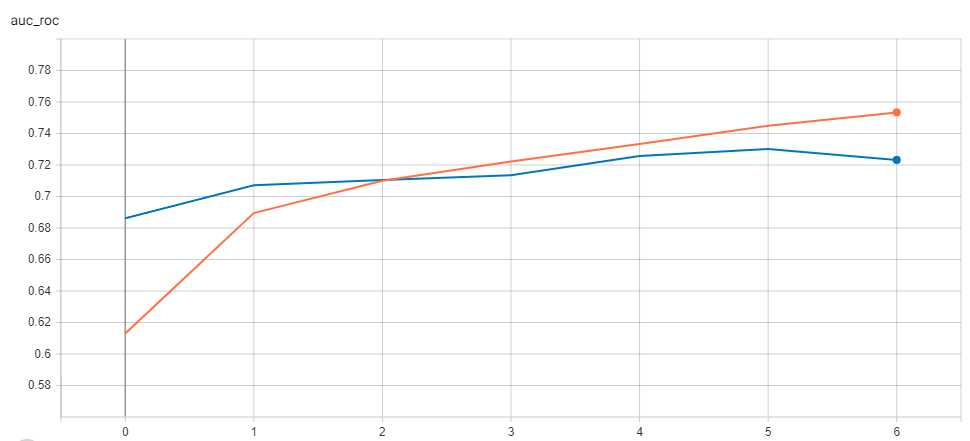

In [0]:
from IPython.display import Image
Image(filename="i2.PNG")

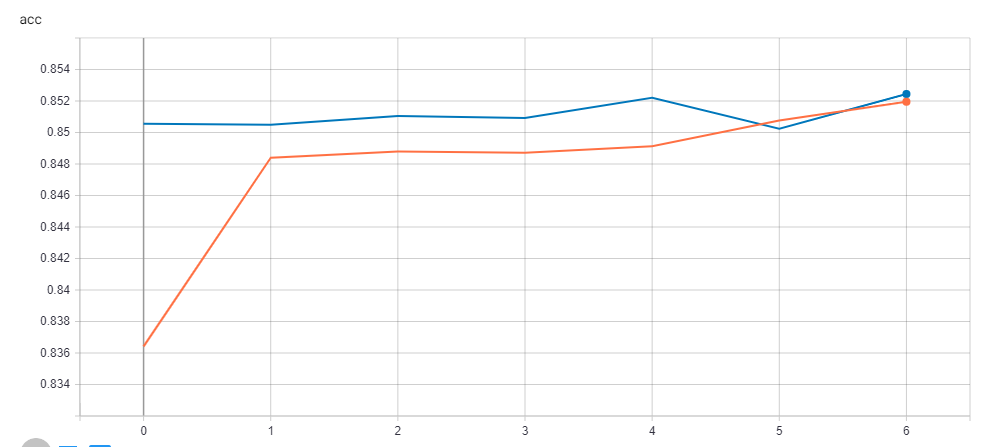

In [0]:
from IPython.display import Image
Image(filename="i1.PNG")

In [0]:
score=model.evaluate([cat_test,sub_cat_test,padded_docs_test,school_state_test,project_grade_test,teacher_prefix_test,df_test],test_labels,batch_size=500)
score

10924/10924 [==============================] - 6s 546us/step


[0.3842388830727075, 0.8514280524370829, 0.7280885040656501]

In [0]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

### Model-2

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
vect.fit(project_data['preprocessed_essay'])
vect.idf_ 

array([ 7.14888335,  5.93354679, 11.62052214, ..., 11.21505704,
       11.62052214, 11.62052214])

In [52]:
vect.vocabulary_.keys()

dict_keys(['engage', 'students', 'learning', 'simple', 'make', 'explorers', 'discoverers', 'creators', 'education', 'providing', 'real', 'world', 'experiences', 'hands', 'materials', 'classroom', 'come', 'high', 'poverty', 'area', 'many', 'not', 'access', 'quality', 'outside', 'school', 'want', 'able', 'create', 'pick', 'topics', 'interested', 'excited', 'need', 'bring', 'units', 'life', 'bugs', 'better', 'way', 'ones', 'help', 'become', 'scientists', 'entomologists', 'books', 'learn', 'research', 'insects', 'group', 'record', 'information', 'observing', 'reading', 'watch', 'videos', 'live', 'different', 'levels', 'curious', 'learners', 'find', 'answers', 'questions', 'goals', 'insect', 'experts', 'also', 'plan', 'applying', 'taking', 'field', 'trip', 'bosque', 'finding', 'classify', 'end', 'unit', 'write', 'habitats', 'know', 'facts', 'category', 'arachnid', 'etc', 'apply', 'writing', 'science', 'love', 'fun', 'nannan', 'first', 'graders', 'elementary', 'delaware', 'spend', 'part', 'd

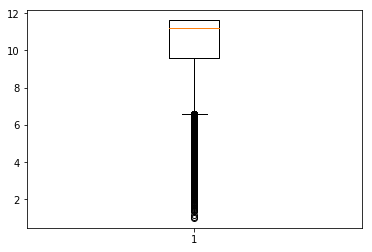

In [53]:
import matplotlib.pyplot as plt
plt.boxplot(vect.idf_)
plt.show()

In [90]:
import numpy as np
np.percentile(vect.idf_,85)

11.620522143549415

Use the same model as above but for 'input_seq_total_text_data' give only some words in the sentance not all the words. Filter the words as below. 

<pre>
1. Train the TF-IDF on the Train data <br>
2. Get the idf value for each word we have in the train data. <br>
3. Remove the low idf value and high idf value words from our data. Do some analysis on the Idf values and based on those values choose the low and high threshold value. Because very frequent words and very very rare words don't give much information. (you can plot a box plots and take only the idf scores within IQR range and corresponding words)<br>
4. Train the LSTM after removing the Low and High idf value words. (In model-1 Train on total data but in Model-2 train on data after removing some words based on IDF values)
</pre>

In [0]:
z=list(vect.vocabulary_.keys())
z_val=list(vect.idf_)
d=dict(zip(z,z_val))

In [0]:
max_val=11
min_val=9.5
for key in list(d.keys()):
  if d[key]>max_val or d[key] < min_val:
    del d[key]
    
d

In [57]:
from tqdm.auto import tqdm
preprocessed_essay_idf=[]
z=[]
for sent in tqdm(project_data['preprocessed_essay'].values):
  #print(j)
  z=' '.join(j for j in sent.split() if (j in list(d.keys())))
  #print(z)
  preprocessed_essay_idf.append(z.strip())
  #print(preprocessed_essay_idf) 

In [0]:
import pickle
with open("test1.txt", "wb") as fp:   #Pickling
  pickle.dump(preprocessed_essay_idf_test, fp)

In [56]:
#Test
from tqdm.auto import tqdm
preprocessed_essay_idf_test=[]
z=[]
for sent in tqdm(project_data_test['preprocessed_essay'].values):
  #print(j)
  z=' '.join(j for j in sent.split() if (j in list(d.keys())))
  #print(z)
  preprocessed_essay_idf_test.append(z.strip())
  #print(preprocessed_essay_idf)

In [58]:
#CV
from tqdm.auto import tqdm
preprocessed_essay_idf_cv=[]
z=[]
for sent in tqdm(project_data_cv['preprocessed_essay'].values):
  #print(j)
  z=' '.join(j for j in sent.split() if (j in list(d.keys())))
  #print(z)
  preprocessed_essay_idf_cv.append(z.strip())
  #print(preprocessed_essay_idf)

In [0]:
import pickle
with open("test2.txt", "wb") as fp:   #Pickling
  pickle.dump(preprocessed_essay_idf_cv, fp)

In [0]:
with open("test.txt", "rb") as fp:   # Unpickling
  preprocessed_essay_idf = pickle.load(fp)

In [0]:
project_data['preprocessed_essay_idf']=preprocessed_essay_idf
project_data_test['preprocessed_essay_idf']=preprocessed_essay_idf_test
project_data_cv['preprocessed_essay_idf']=preprocessed_essay_idf_cv


In [62]:
with open('glove_vector', 'rb') as f:
    gv = pickle.load(f)
    glove_words =  set(gv.keys())
    
# define documents
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(project_data['preprocessed_essay_idf'])
vocab_size = len(t.word_index) + 1
# integer encode the documents
print(vocab_size)
encoded_docs_idf = t.texts_to_sequences(project_data['preprocessed_essay_idf'])

#print(encoded_docs)
# pad documents to a max length of 4 words
max_length = 500
padded_docs_idf = pad_sequences(encoded_docs_idf, maxlen=max_length, padding='post')
#print(padded_docs)
# load the whole embedding into memory
embeddings_index = dict()
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in t.word_index.items():
	embedding_vector = gv.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector
# define model
from keras.engine.input_layer import Input

input_layer_text_idf=Input(shape=(500,))
e = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=500, trainable=False)(input_layer_text_idf)
l=LSTM(32,return_sequences=True)(e)
output_seq_total_text_data_idf = Flatten()(e)

12701


In [0]:
encoded_docs_idf_test = t.texts_to_sequences(project_data_test['preprocessed_essay_idf'])
#print(encoded_docs)
# pad documents to a max length of 4 words
max_length = 500
padded_docs_idf_test = pad_sequences(encoded_docs_idf_test, maxlen=max_length, padding='post')
#print(padded_docs)

In [0]:
encoded_docs_idf_cv = t.texts_to_sequences(project_data_cv['preprocessed_essay_idf'])

#print(encoded_docs)
# pad documents to a max length of 4 words
max_length = 500
padded_docs_idf_cv = pad_sequences(encoded_docs_idf_cv, maxlen=max_length, padding='post')
#print(padded_docs)

In [94]:
from keras.models import Model
from keras.layers import concatenate
inputs_=[input_layer_cat,input_layer_sub_cat,input_layer_text_idf,input_layer_school_state,input_layer_project_grade,input_layer_teacher_prefix,input_layer_combined]
outputs_=[output_clean_categories,output_clean_sub_categories,output_seq_total_text_data_idf,output_school_state,output_project_grade,output_teacher_prefix,output_combined_dense_combined]
out=concatenate(outputs_)

main_output = Dense(500,activation='relu',kernel_initializer='glorot_normal')(out)
main_output = Dropout(0.5)(main_output)
main_output = Dense(100,activation='sigmoid',kernel_initializer='glorot_normal')(main_output)
main_output = Dropout(0.9)(main_output)
main_output = Dense(64,activation='sigmoid',kernel_initializer='glorot_normal')(main_output)
main_output = Dense(2,activation='softmax')(main_output)

model=Model(inputs=inputs_,outputs=[main_output])
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy',auc_roc])

W0723 06:49:05.536652 140175062103936 nn_ops.py:4224] Large dropout rate: 0.9 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


In [95]:
from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback
tbc=TensorBoardColab()

Wait for 8 seconds...
TensorBoard link:
https://ba0e17e3.ngrok.io


In [96]:
model.fit([cat_,sub_cat_,padded_docs_idf,school_state,project_grade,teacher_prefix,df], train_labels,epochs=10, batch_size=500,validation_data=([cat_cv,sub_cat_cv,padded_docs_idf_cv,school_state_cv,project_grade_cv,teacher_prefix_cv,df_cv],cv_labels),callbacks=[TensorBoardColabCallback(tbc)])

Train on 81933 samples, validate on 16387 samples
Epoch 1/10
81933/81933 [==============================] - 40s 484us/step - loss: 0.4480 - acc: 0.8379 - auc_roc: 0.5011 - val_loss: 0.4385 - val_acc: 0.8478 - val_auc_roc: 0.5766
Epoch 2/10
81933/81933 [==============================] - 39s 476us/step - loss: 0.4281 - acc: 0.8488 - auc_roc: 0.5066 - val_loss: 0.4260 - val_acc: 0.8478 - val_auc_roc: 0.6110
Epoch 3/10
81933/81933 [==============================] - 39s 476us/step - loss: 0.4268 - acc: 0.8488 - auc_roc: 0.5071 - val_loss: 0.4252 - val_acc: 0.8478 - val_auc_roc: 0.6158
Epoch 4/10
81933/81933 [==============================] - 39s 476us/step - loss: 0.4256 - acc: 0.8488 - auc_roc: 0.5221 - val_loss: 0.4223 - val_acc: 0.8478 - val_auc_roc: 0.6210
Epoch 5/10
81933/81933 [==============================] - 39s 476us/step - loss: 0.4244 - acc: 0.8488 - auc_roc: 0.5364 - val_loss: 0.4186 - val_acc: 0.8478 - val_auc_roc: 0.6216
Epoch 6/10
81933/81933 [==============================]

In [99]:
score=model.evaluate([cat_test,sub_cat_test,padded_docs_idf_test,school_state_test,project_grade_test,teacher_prefix_test,df_test],test_labels,batch_size=100)
score

10925/10925 [==============================] - 3s 300us/step


[0.43614172348987046, 0.8478718498205975, 0.6167694346761787]

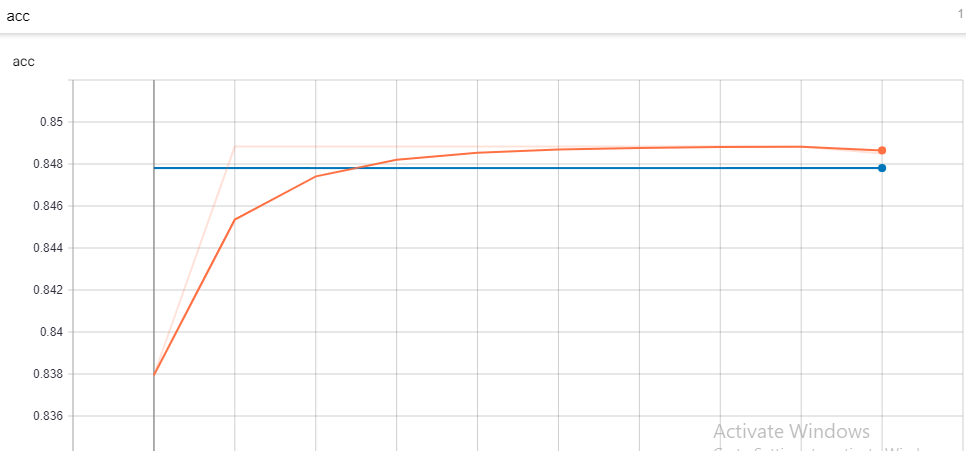

In [100]:
from IPython.display import Image
Image(filename="1.PNG")
#Accuracy

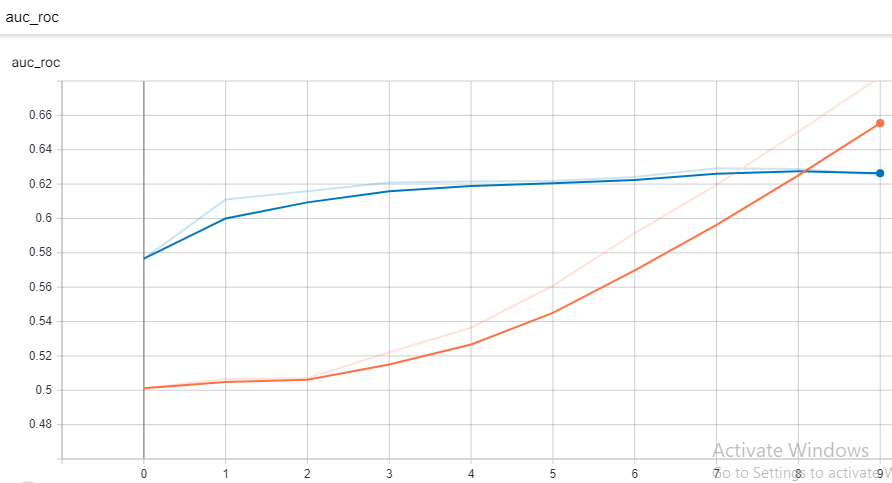

In [101]:
from IPython.display import Image
Image(filename="2.PNG")
#AUC_ROC

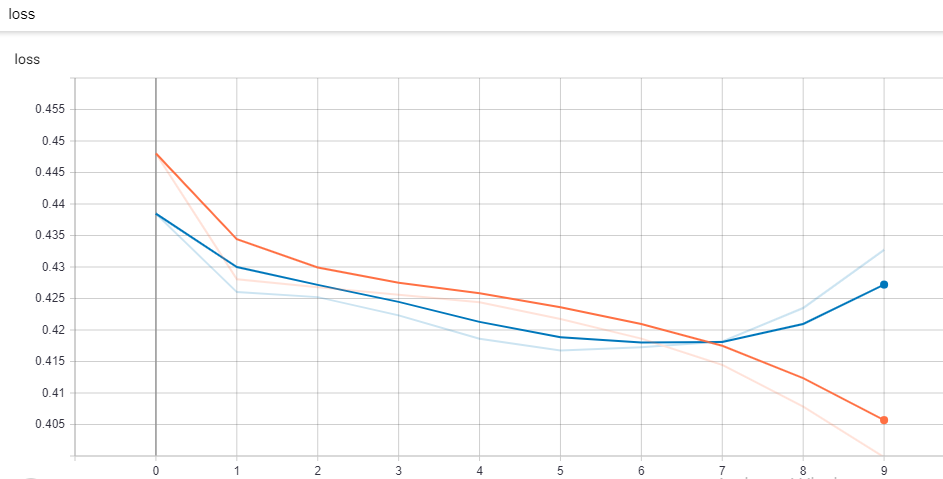

In [102]:
from IPython.display import Image
Image(filename="3.PNG")
#LOSS

### Model-3

<img src='https://i.imgur.com/fkQ8nGo.png'>
ref: https://i.imgur.com/fkQ8nGo.png


- __input_seq_total_text_data__: <br>
<pre>
    . Use text column('essay'), and use the Embedding layer to get word vectors. <br>
    . Use given predefined glove word vectors, don't train any word vectors. <br>
    . Use LSTM that is given above, get the LSTM output and Flatten that output. <br>
    . You are free to preprocess the input text as you needed. <br>
</pre>
- __Other_than_text_data__:<br>
<pre>
    . Convert all your Categorical values to onehot coded and then concatenate all these onehot vectors <br>
    . Neumerical values and use <a href='https://keras.io/getting-started/sequential-model-guide/#sequence-classification-with-1d-convolutions'>CNN1D</a> as shown in above figure. <br>
    . You are free to choose all CNN parameters like kernel sizes, stride.<br>
    
</pre>

In [0]:
from keras.layers import Conv1D
from keras.layers import concatenate,BatchNormalization

other = hstack((cat_,sub_cat_,school_state,project_grade,teacher_prefix,combined))
other_cv = hstack((cat_cv,sub_cat_cv,school_state_cv,project_grade_cv,teacher_prefix_cv,combined_cv))
other_test = hstack((cat_test,sub_cat_test,school_state_test,project_grade_test,teacher_prefix_test,combined_test))
import numpy
other = numpy.reshape(other, other.shape + (1,))
other_test = numpy.reshape(other_test, other_test.shape + (1,))
other_cv = numpy.reshape(other_cv, other_cv.shape + (1,))


input_other_layer =  Input(shape=(82,1))
output_other_layer = Conv1D(10,(10),kernel_initializer='glorot_normal')(input_other_layer)
output_other_layer = Conv1D(10,(10))(output_other_layer)
output_other_layer = Flatten()(output_other_layer)

inputs_3 =[input_layer_text,input_other_layer]
output_3=[output_seq_total_text_data,output_other_layer]
out3 = concatenate(output_3)

main_output3 = Dense(128,kernel_initializer='glorot_normal')(out3)
main_output3 = Dropout(0.3)(main_output3)
main_output3 = Dense(64,kernel_initializer='glorot_normal')(main_output3)
main_output3 = BatchNormalization()(main_output3)
main_output3 = Dropout(0.5)(main_output3)
main_output3 = Dense(32)(main_output3)
main_output3 = Dense(2,activation='softmax')(main_output3)

model=Model(inputs=inputs_3,outputs=[main_output3])
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy',auc_roc])

In [0]:
from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback
tbc=TensorBoardColab()

Wait for 8 seconds...
TensorBoard link:
https://a2e15741.ngrok.io


In [0]:
model.fit([padded_docs,other], train_labels,epochs=12,batch_size=1000,validation_data=([padded_docs_cv,other_cv],cv_labels),callbacks=[TensorBoardColabCallback(tbc)])

Train on 81934 samples, validate on 16386 samples
Epoch 1/12
81934/81934 [==============================] - 104s 1ms/step - loss: 0.6629 - acc: 0.7033 - auc_roc: 0.5837 - val_loss: 0.4304 - val_acc: 0.8429 - val_auc_roc: 0.6579
Epoch 2/12
81934/81934 [==============================] - 102s 1ms/step - loss: 0.4366 - acc: 0.8413 - auc_roc: 0.6333 - val_loss: 0.3872 - val_acc: 0.8479 - val_auc_roc: 0.7061
Epoch 3/12
81934/81934 [==============================] - 102s 1ms/step - loss: 0.3900 - acc: 0.8470 - auc_roc: 0.7073 - val_loss: 0.3810 - val_acc: 0.8474 - val_auc_roc: 0.7246
Epoch 4/12
81934/81934 [==============================] - 102s 1ms/step - loss: 0.3763 - acc: 0.8505 - auc_roc: 0.7309 - val_loss: 0.3774 - val_acc: 0.8474 - val_auc_roc: 0.7402
Epoch 5/12
81934/81934 [==============================] - 102s 1ms/step - loss: 0.3710 - acc: 0.8512 - auc_roc: 0.7424 - val_loss: 0.3739 - val_acc: 0.8474 - val_auc_roc: 0.7408
Epoch 6/12
81934/81934 [==============================] - 10

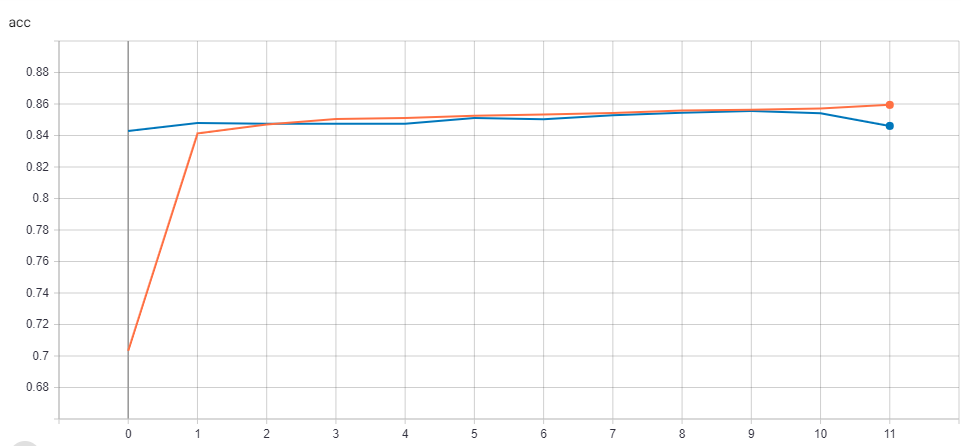

In [0]:
from IPython.display import Image
Image(filename="i1.PNG")

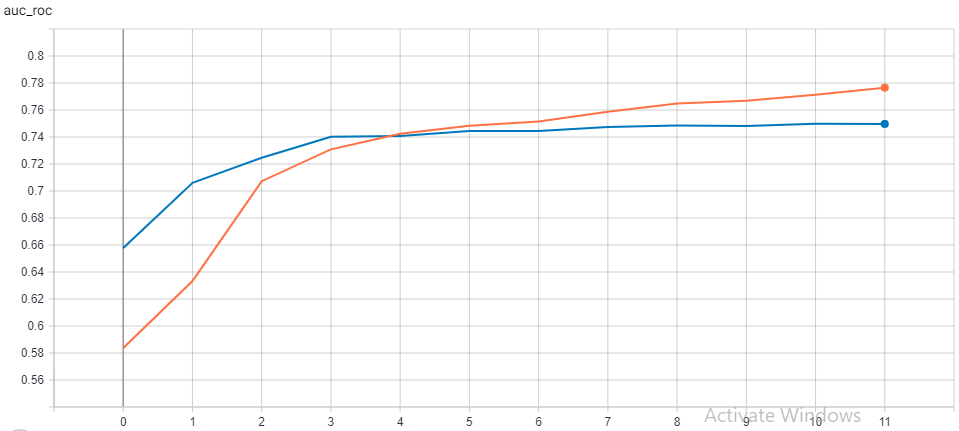

In [0]:
from IPython.display import Image
Image(filename="i2.PNG")

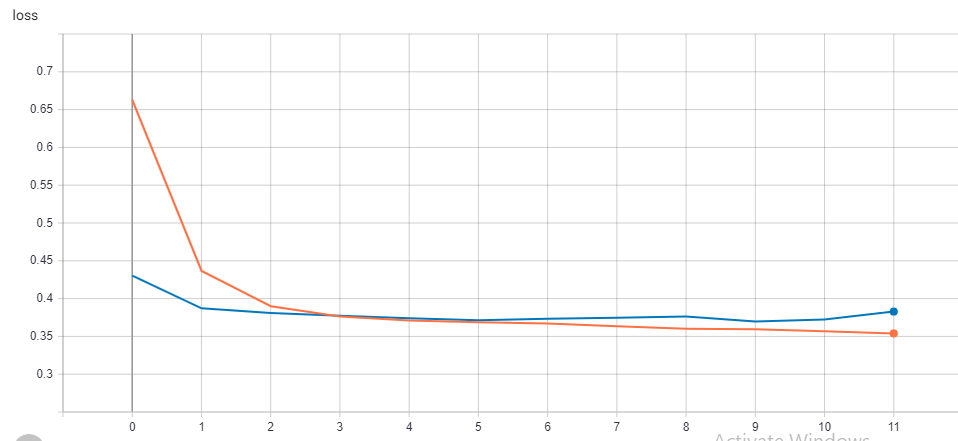

In [0]:
from IPython.display import Image
Image(filename="i3.PNG")

In [0]:
score=model.evaluate([padded_docs_test,other_test], test_labels,batch_size=500)
score

10925/10925 [==============================] - 9s 804us/step


[0.3837097351965697, 0.8435697940176085, 0.750313616442303]

##Conclusion

In [0]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model Number", "Loss", "Accuracy", "AUC"]

x.add_row(["1.",0.38, 0.85, 0.72 ])
x.add_row(["2.",0.42, 0.84, 0.63 ])
x.add_row(["3.",0.38, 0.84, 0.75])
print(x)

+--------------+------+----------+------+
| Model Number | Loss | Accuracy | AUC  |
+--------------+------+----------+------+
|      1.      | 0.38 |   0.85   | 0.72 |
|      2.      | 0.42 |   0.84   | 0.63 |
|      3.      | 0.38 |   0.84   | 0.75 |
+--------------+------+----------+------+
